## Problem Statement No. 03
1) Write a Python program to display some basic statistical details like percentile, mean, standard deviation etc. of the
species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-virginica’ of iris.csv dataset.
2) Calculate the measures of variability. Calculate and provide the visualization of the Correlation among the variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\OneDrive\Desktop\Desktop\New folder\Datasets\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

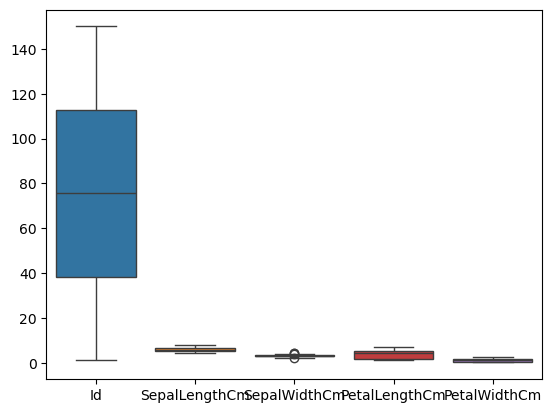

In [4]:
sns.boxplot(df)

<Axes: >

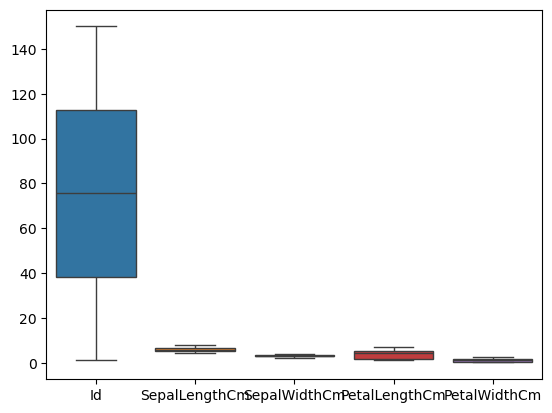

In [5]:
q1=df["SepalWidthCm"].quantile(0.25)
q3=df["SepalWidthCm"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df["SepalWidthCm"]=np.where(df["SepalWidthCm"]<lower,lower,df["SepalWidthCm"])
df["SepalWidthCm"]=np.where(df["SepalWidthCm"]>upper,upper,df["SepalWidthCm"])
sns.boxplot(df)

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
feature=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in species:
    print(f"The Description Of {i} :")
    data=df[df['Species']==i]
    print(data.describe())
    for col in feature:
        data1=data[col]
        print(f"Variance of {col} : {data1.var()}")
        print(f"Std : {data1.std()}")
        print()
        

The Description Of Iris-setosa :
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.407000       1.464000       0.24400
std    14.57738        0.35249      0.357573       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.050000       1.900000       0.60000
Variance of SepalLengthCm : 0.12424897959183666
Std : 0.3524896872134512

Variance of SepalWidthCm : 0.1278581632653061
Std : 0.35757259859405627

Variance of PetalLengthCm : 0.030106122448979603
Std : 0.1735111594364455

Variance of PetalWidthCm : 0.011493877551020404
Std : 0.10720950308167837

The 

<Axes: >

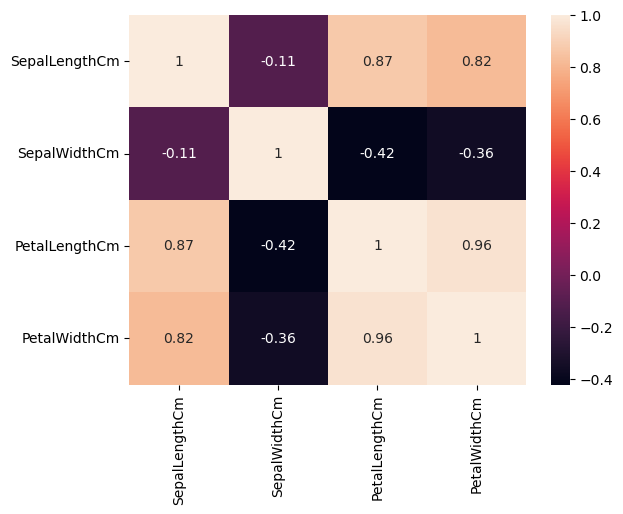

In [16]:

sns.heatmap(df[feature].corr(),annot=True)

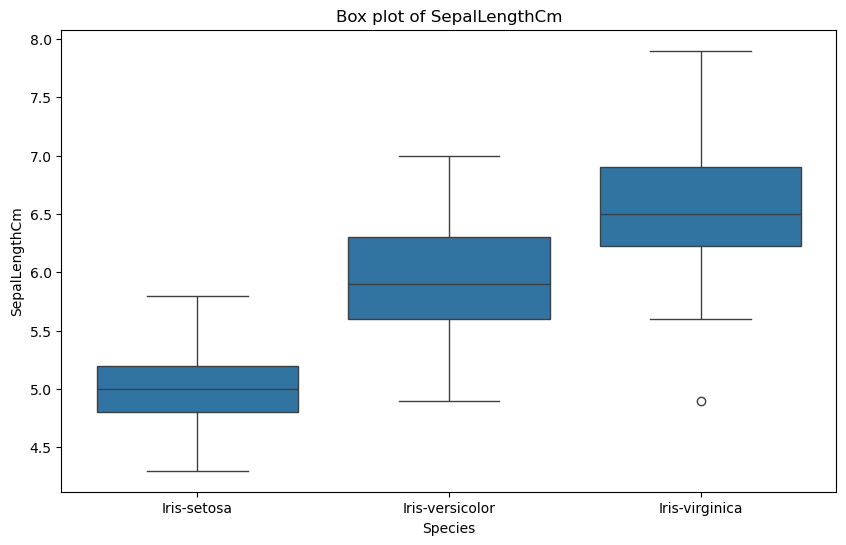

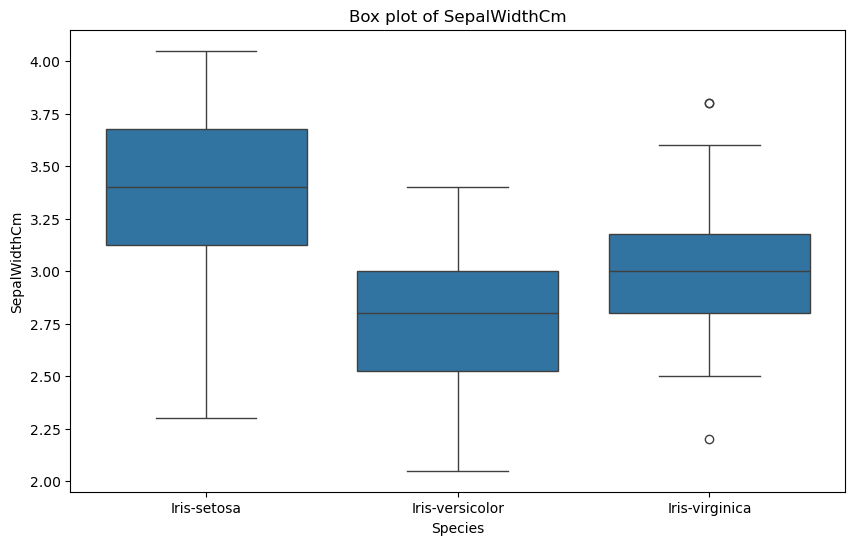

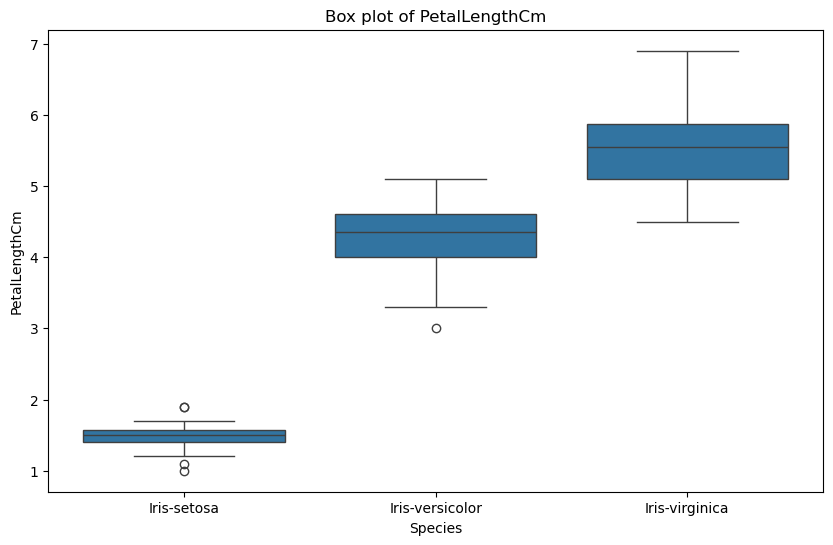

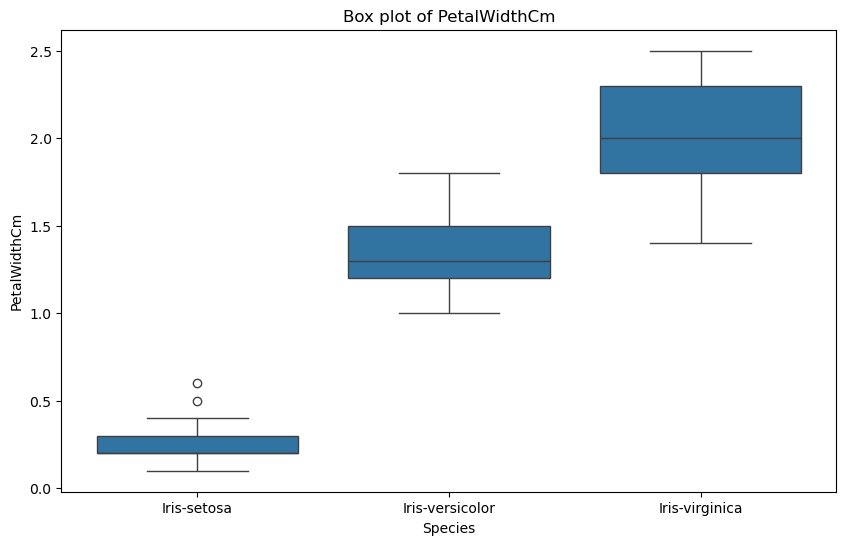

In [20]:
for i in feature:
    plt.figure(figsize=(10,6))
    plt.title(f"Box plot of {i}")
    sns.boxplot(x="Species",y=i,data=df)
    plt.plot()